In [1]:
from ml.neural_network import NeuralNetwork
from matplotlib.pyplot import *
import numpy as np
import seaborn as sns
%matplotlib inline
%load_ext autoreload

/Users/jeremy/Development/anaconda/envs/ml/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


# Prepare Non-linearly Separable Data

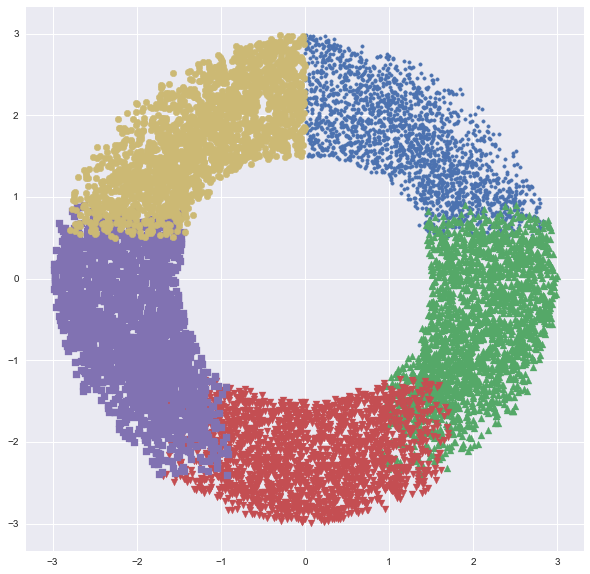

In [2]:
Y = np.array([])
X1 = np.array([])
X2 = np.array([])

np.random.seed(0)
classes = ['.', '^', 'v', 's', '8']
start = 0
overlap = 0.0
inner_radius = 1.5
outer_radius = 3
n_classes = len(classes)
inc = (np.pi * 2) / n_classes
points_per_class = 2048
figure(figsize=(10, 10))
for i in range(0, n_classes):
    end = start + inc# + np.random.uniform(0, overlap)
    t = np.random.uniform(start, end, points_per_class)
    x1 = np.sin(t) * np.random.uniform(inner_radius, outer_radius, points_per_class)
    x2 = np.cos(t) * np.random.uniform(inner_radius, outer_radius, points_per_class)
    start += inc
    scatter(x1, x2, marker=classes[i])
    X1 = np.concatenate((X1, x1), axis=0)
    X2 = np.concatenate((X2, x2), axis=0)
    Y = np.concatenate((Y, [i for x in range(0, points_per_class)]), axis=0)

In [3]:
data = np.array([X1, X2, Y])
print(data.shape)

(3, 10240)


In [4]:
%autoreload
nn = NeuralNetwork([2, 3, n_classes])

In [5]:
nn.learn(np.array([X1, X2]), Y)

In [6]:
print(nn)

Weight Parameters:
Layer: 0 , Shape: (3, 2)
[[ 0.5488135   0.71518937]
 [ 0.60276338  0.54488318]
 [ 0.4236548   0.64589411]]
Layer: 1 , Shape: (5, 3)
[[ 0.43758721  0.891773    0.96366276]
 [ 0.38344152  0.79172504  0.52889492]
 [ 0.56804456  0.92559664  0.07103606]
 [ 0.0871293   0.0202184   0.83261985]
 [ 0.77815675  0.87001215  0.97861834]]

Bias Parameters:
Layer: 0 , Shape: (3, 1)
[[ 0.]
 [ 0.]
 [ 0.]]
Layer: 1 , Shape: (5, 1)
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

Activations Parameters:
Layer: 0 , Shape: (2, 10240)
[[ 1.68835323  1.271428    2.03522531 ..., -0.11113177 -0.68201275
  -1.1517735 ]
 [ 1.52552242  1.5342652   1.55965701 ...,  2.24095097  1.68584298
   1.55424794]]
Layer: 1 , Shape: (3, 10240)
[[ 2.01762847  1.79506701  2.23240924 ...,  1.54171369  0.83139917
   0.47947275]
 [ 1.848909    1.60236554  2.07659016 ...,  1.15407034  0.50749519
   0.15263668]
 [ 1.7006049   1.52961943  1.86960625 ...,  1.40033553  0.79993809
   0.51592522]]
Layer: 2 , Shape: (5, 10240)
[[ 